In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load the dataset
df = pd.read_csv('/content/pro_crop_data.csv')

# Select relevant features for clustering
features = [
    'crop_temp', 'crop_humidity', 'crop_ph', 'crop_nitrogen', 'crop_phosphorus',
    'crop_potassium', 'crop_calcium', 'crop_magnesium'
]

X = df[features]

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train K-means clustering model
n_clusters = 5  # Adjust the number of clusters (n_clusters) as needed
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_scaled)

# Function to predict suitable crop
def predict_crop(water_quality):
    # Scale the input water quality parameters
    water_quality_scaled = scaler.transform([water_quality])

    # Predict the cluster
    cluster = kmeans.predict(water_quality_scaled)[0]

    # Get crops in the same cluster
    cluster_indices = np.where(kmeans.labels_ == cluster)[0]
    cluster_crops = df.iloc[cluster_indices]

    # Calculate the Euclidean distance between the input and crops in the cluster
    cluster_features_scaled = X_scaled[cluster_indices]
    distances = np.linalg.norm(cluster_features_scaled - water_quality_scaled, axis=1)

    # Add distances to the dataframe and sort by distance
    cluster_crops['distance'] = distances
    top_crops = cluster_crops.sort_values(by='distance').head(5)

    return top_crops[['crop_id', 'crop_name', 'distance']]

# Example water quality data input
water_quality_input = [35.23, 552.50, 9.80, 70.75, 20.45, 9.92, 3.10, 0.21]

# Predict suitable crops
suitable_crops = predict_crop(water_quality_input)
print(suitable_crops)


      crop_id      crop_name   distance
541       541     cantaloupe  18.700897
18         18       aloevera  18.850809
2631     2631  passionflower  19.229170
3573     3573         tatsoi  19.576926
3379     3379        spinach  19.599782


### Seperating features and target label

In [ ]:
features = df[['crop_temp','crop_ph',
       'crop_nitrogen', 'crop_phosphorus', 'crop_potassium', 'crop_calcium',
       'crop_magnesium','crop_ec']]
target = df['crop_name']
#features = df[['temperature', 'humidity', 'ph', 'rainfall']]
labels = df['crop_name']

In [ ]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [ ]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.1,random_state =128)

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=128,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  0.9950248756218906
                         precision    recall  f1-score   support

               aloevera       0.00      0.00      0.00         1
      armeniancucumbers       0.00      0.00      0.00         4
                arugula       0.00      0.00      0.00         0
            ashwagandha       0.00      0.00      0.00         2
           babyeggplant       0.00      0.00      0.00         2
            babyspinach       0.00      0.00      0.00         2
              baylaurel       0.00      0.00      0.00         2
                bayleaf       0.00      0.00      0.00         1
      beefsteaktomatoes       0.00      0.00      0.00         2
             beetgreens       0.00      0.00      0.00         2
               beetroot       0.00      0.00      0.00         1
               bergamot       0.00      0.00      0.00         4
  bibbbutterheadlettuce       0.00      0.00      0.00         2
           blackberries       0.00      

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

In [ ]:
score

array([0.00622665, 0.00872818, 0.00374065, 0.00997506, 0.00623441])

### Saving trained Decision Tree model

In [ ]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = '../models/DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

# Guassian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.004975124378109453
                         precision    recall  f1-score   support

               aloevera       0.00      0.00      0.00         1
      armeniancucumbers       0.00      0.00      0.00         4
                arugula       0.00      0.00      0.00         0
            ashwagandha       0.00      0.00      0.00         2
           babyeggplant       0.00      0.00      0.00         2
            babyspinach       0.00      0.00      0.00         2
              baylaurel       0.00      0.00      0.00         2
                bayleaf       0.00      0.00      0.00         1
      beefsteaktomatoes       0.14      0.50      0.22         2
             beetgreens       0.00      0.00      0.00         2
               beetroot       0.00      0.00      0.00         1
               bergamot       0.00      0.00      0.00         4
  bibbbutterheadlettuce       0.00      0.00      0.00         2
           blackberries       0.00      

In [ ]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.00373599, 0.00498753, 0.00124688, 0.00374065, 0.00872818])

### Saving trained Guassian Naive Bayes model

In [ ]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = '../models/NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

# Support Vector Machine (SVM)

In [ ]:
# from sklearn.svm import SVC
# # data normalization with sklearn
# from sklearn.preprocessing import MinMaxScaler
# # fit scaler on training data
# norm = MinMaxScaler().fit(Xtrain)
# X_train_norm = norm.transform(Xtrain)
# # transform testing dataabs
# X_test_norm = norm.transform(Xtest)
# SVM = SVC(kernel='poly', degree=3, C=1)
# SVM.fit(X_train_norm,Ytrain)
# predicted_values = SVM.predict(X_test_norm)
# x = metrics.accuracy_score(Ytest, predicted_values)
# acc.append(x)
# model.append('SVM')
# print("SVM's Accuracy is: ", x)

# print(classification_report(Ytest,predicted_values))

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'poly', 'rbf'], 'degree': [2, 3, 4]}

# Create the SVM model
svm = SVC()

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(Xtrain, Ytrain)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Evaluate the model with the best parameters
best_model = grid_search.best_estimator_
accuracy = best_model.score(Xtest, Ytest)
print("Accuracy:", accuracy)

KeyboardInterrupt: 

In [ ]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.00498132, 0.00374065, 0.00498753, 0.00623441, 0.00498753])

In [ ]:
#Saving trained SVM model

In [ ]:
import pickle
# Dump the trained SVM classifier with Pickle
SVM_pkl_filename = '../models/SVMClassifier.pkl'
# Open the file to save as pkl file
SVM_Model_pkl = open(SVM_pkl_filename, 'wb')
pickle.dump(SVM, SVM_Model_pkl)
# Close the pickle instances
SVM_Model_pkl.close()

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=8)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.0024875621890547263
                         precision    recall  f1-score   support

               aloevera       0.00      0.00      0.00         1
      armeniancucumbers       0.00      0.00      0.00         4
            ashwagandha       0.00      0.00      0.00         2
           babyeggplant       0.00      0.00      0.00         2
            babyspinach       0.00      0.00      0.00         2
              baylaurel       0.00      0.00      0.00         2
                bayleaf       0.00      0.00      0.00         1
         beechmushrooms       0.00      0.00      0.00         0
      beefsteaktomatoes       0.00      0.00      0.00         2
             beetgreens       0.00      0.00      0.00         2
               beetroot       0.00      0.00      0.00         1
               bergamot       0.00      0.00      0.00         4
  bibbbutterheadlettuce       0.00      0.00      0.00         2
           blackberries       0

In [ ]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.00498132, 0.00249377, 0.0074813 , 0.00498753, 0.00872818])

### Saving trained Logistic Regression model

In [ ]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = '../models/LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100, random_state=8)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.0024875621890547263
                         precision    recall  f1-score   support

               aloevera       0.00      0.00      0.00         1
      armeniancucumbers       0.00      0.00      0.00         4
                arugula       0.00      0.00      0.00         0
            ashwagandha       0.00      0.00      0.00         2
           babyeggplant       0.00      0.00      0.00         2
            babyspinach       0.00      0.00      0.00         2
              baylaurel       0.00      0.00      0.00         2
                bayleaf       0.00      0.00      0.00         1
         beechmushrooms       0.00      0.00      0.00         0
      beefsteaktomatoes       0.00      0.00      0.00         2
             beetgreens       0.00      0.00      0.00         2
               beetroot       0.00      0.00      0.00         1
               bergamot       0.00      0.00      0.00         4
  bibbbutterheadlettuce       0.00      0.00    

In [ ]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.00249066, 0.00498753, 0.00124688, 0.0074813 , 0.00249377])

### Saving trained Random Forest model

In [ ]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = '../models/RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

# XGBoost

In [ ]:
# import xgboost as xgb
# XB = xgb.XGBClassifier()
# XB.fit(Xtrain,Ytrain)

# predicted_values = XB.predict(Xtest)

# x = metrics.accuracy_score(Ytest, predicted_values)
# acc.append(x)
# model.append('XGBoost')
# print("XGBoost's Accuracy is: ", x)

# print(classification_report(Ytest,predicted_values))
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import classification_report

# Assuming 'Ytrain' and 'Ytest' currently contain string labels
le = LabelEncoder()
Ytrain_encoded = le.fit_transform(Ytrain)
Ytest_encoded = le.transform(Ytest)

XB = xgb.XGBClassifier()
XB.fit(Xtrain, Ytrain_encoded)  # Train with encoded labels

predicted_values = XB.predict(Xtest)

x = metrics.accuracy_score(Ytest_encoded, predicted_values)  # Evaluate with encoded labels
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)

print(classification_report(Ytest_encoded, predicted_values))  # Use encoded labels for report

XGBoost's Accuracy is:  0.004975124378109453
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         4
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         4
          15       1.00      0.33      0.50         3
          16       0.00      0.00      0.00         1
          17       0.00      0.00   

In [ ]:
# # Cross validation score (XGBoost)
# score = cross_val_score(XB,features,target,cv=5)
# score
# Cross validation score (XGBoost)
# Ensure 'features' and 'Ytrain_encoded' have the same number of samples
assert len(features) == len(Ytrain_encoded), "Features and labels must have the same length"

score = cross_val_score(XB, features, Ytrain_encoded, cv=5)  # Use encoded labels for cross-validation
score

Shape of features: (4011, 8)
Shape of Ytrain_encoded: (3609,)


AssertionError: Features and labels must have the same length

### Saving trained XGBoost model

In [ ]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
XB_pkl_filename = '../models/XGBoost.pkl'
# Open the file to save as pkl file
XB_Model_pkl = open(XB_pkl_filename, 'wb')
pickle.dump(XB, XB_Model_pkl)
# Close the pickle instances
XB_Model_pkl.close()

## Accuracy Comparison

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

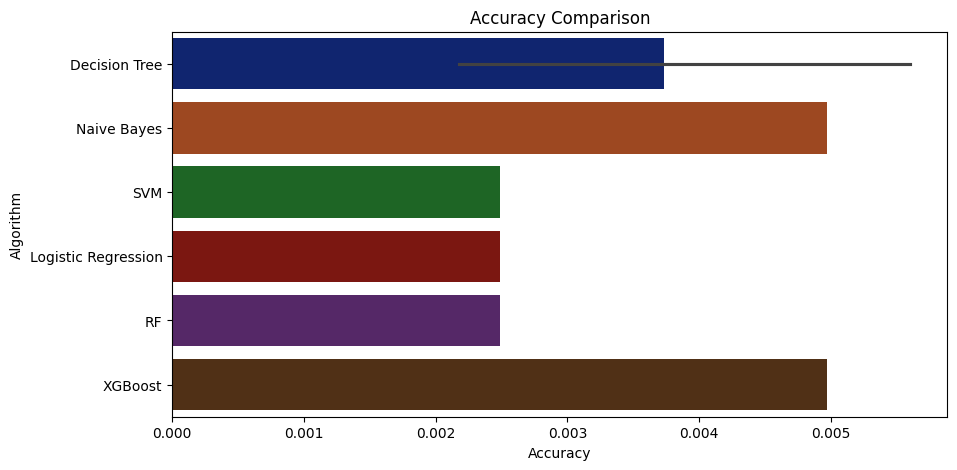

In [ ]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [ ]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.0024875621890547263
Naive Bayes --> 0.0024875621890547263
SVM --> 0.0024875621890547263
Logistic Regression --> 0.0
RF --> 0.004975124378109453
XGBoost --> 0.007462686567164179


## Making a prediction

In [ ]:
data = np.array([[26.17526,339.0,6.5,64.17875,20.33515,9.93232,3.00047,0.19864,5.06696,0.50262,0.49952,0.49966,0.49681,0.50083,0.50184,0.4992,0.47646,0.48567,0.94932,2.23409,440.92693]])
prediction = RF.predict(data)
print(prediction)

['aloevera']


In [ ]:
data = np.array([[50.1651,348.312,6.75622,71.6564,19.67101,10.19387,3.0205,0.18514,4.96562,0.49923,0.49994,0.49899,0.50054,0.49848,0.49674,0.50047,0.52119,0.57595,0.42673,2.53341,536.26246]])
prediction = RF.predict(data)
print(prediction)

['jerusalemartichokes']
